## Introduction
This report analyses at the data from the [World Health Organization](http://www.who.int/en) 
for the *causes of child death by country* ([download](http://apps.who.int/gho/data/node.main.ghe2002015-by-country?lang=en)). For more information, please refer to the data [reference](http://apps.who.int/gho/data/node.wrapper.imr?x-id=3366). Briefly, these data look into the number of deaths (per 1 000 live births) in children up to 5 years of age for different cause of child death. 

### Rationale
Rapid progress has resulted in a significant decline in preventable child deaths since 1990, with the global under-five mortality rate declining by over half between 1990 and 2016 ([1][1]). Despite these advances, a significant large number of under-five mortality results from largely preventable causes. A better understanding of these causes is needed to assess global health trends, prioritize and coordinate health planning and management both at national and international levels.

**Aims**: Provide an initial exploratory analysis of the child mortality and identify the most common causes of child death \*.

\* Note that at the time of this analysis the data for *Viet Nam* was missing from the WHO website and is not considered

[1]: https://data.unicef.org/topic/child-survival/under-five-mortality/


In [1]:
# Import required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from scipy.stats import ttest_ind
%matplotlib inline

## Load and pre-process data

In [2]:
## Data loading example ##
df = pd.read_csv('data/MORT_100.csv', header = None)
df.head()

0                              1   \
0             NaN                           2016   
1             NaN   Deaths per 1 000 live births   
2             NaN                      Argentina   
3  Cause of death                      0-27 days   
4        HIV/AIDS                              0   

                              2                              3   \
0                           2016                           2016   
1   Deaths per 1 000 live births   Deaths per 1 000 live births   
2                      Argentina                      Argentina   
3                    1-59 months                      0-4 years   
4                              0                              0   

                              4                              5   \
0                           2015                           2015   
1   Deaths per 1 000 live births   Deaths per 1 000 live births   
2                      Argentina                      Argentina   
3                      0-27 days                    1-59 months   
4                              0                              0   

                              6                              7   \
0                           2015                           2014   
1   Deaths per 1 000 live births   Deaths per 1 000 live births   
2                      Argentina                      Argentina   
3                      0-4 years                      0-27 days   
4                              0                              0   

                              8                              9   \
0                           2014                           2014   
1   Deaths per 1 000 live births   Deaths per 1 000 live births   
2                      Argentina                      Argentina   
3                    1-59 months                      0-4 years   
4                              0                              0   

               ...                                           42  \
0              ...                                         2003   
1              ...                 Deaths per 1 000 live births   
2              ...                                    Argentina   
3              ...                                    0-4 years   
4              ...                                            0   

                              43                             44  \
0                           2002                           2002   
1   Deaths per 1 000 live births   Deaths per 1 000 live births   
2                      Argentina                      Argentina   
3                      0-27 days                    1-59 months   
4                              0                            0.1   

                              45                             46  \
0                           2002                           2001   
1   Deaths per 1 000 live births   Deaths per 1 000 live births   
2                      Argentina                      Argentina   
3                      0-4 years                      0-27 days   
4                            0.1                              0   

                              47                             48  \
0                           2001                           2001   
1   Deaths per 1 000 live births   Deaths per 1 000 live births   
2                      Argentina                      Argentina   
3                    1-59 months                      0-4 years   
4                              0                              0   

                              49                             50  \
0                           2000                           2000   
1   Deaths per 1 000 live births   Deaths per 1 000 live births   
2                      Argentina                      Argentina   
3                      0-27 days                    1-59 months   
4                              0                            0.1   

                              51  
0                           2000  
1   D

In [3]:
## Format data frame ## 
df.iloc[:3,0] = np.array(['Year','Rate','Country']) # Add missing names
df = df.transpose()                         # Set causes as columns
df.columns = df.iloc[0]
df = df.drop(index = df.index[0])
df = df.drop(columns = df.columns[1])
df.head()

0  Year     Country Cause of death HIV/AIDS Diarrhoeal diseases Pertussis  \
1  2016   Argentina      0-27 days        0                   0       NaN   
2  2016   Argentina    1-59 months        0                 0.1       NaN   
3  2016   Argentina      0-4 years        0                 0.1       NaN   
4  2015   Argentina      0-27 days        0                   0         0   
5  2015   Argentina    1-59 months        0                 0.1       0.1   

0 Tetanus Measles Meningitis/encephalitis Malaria  \
1       0       0                       0       0   
2       0       0                     0.1       0   
3       0       0                     0.1       0   
4       0       0                       0       0   
5       0       0                     0.1       0   

0 Acute lower respiratory infections Prematurity  \
1                                0.1         2.8   
2                                0.6         0.3   
3                                0.7         3.1   
4                                0.1           3   
5                                0.7         0.3   

0 Birth asphyxia and birth trauma  \
1                             0.4   
2                               0   
3                             0.5   
4                             0.5   
5                               0   

0 Sepsis and other infectious conditions of the newborn  \
1                                                0.6      
2                                                  0      
3                                                0.6      
4                                                0.6      
5                                                  0      

0 Other communicable, perinatal and nutritional conditions  \
1                                                0.5         
2                                                0.2         
3                                                0.7         
4                                                0.5         
5                                                0.2         

0 Congenital anomalies Other noncommunicable diseases Injuries  
1                  1.7                              0        0  
2                  1.5                            1.2      0.7  
3                  3.2                            1.2      0.8  
4                  1.9                              0        0  
5                  1.5                            1.2      0.8

In [4]:
# Simplify rates by summing all ages 
df.iloc[:,3:] = df.iloc[:,3:].apply(pd.to_numeric) 
df = df.drop(columns = df.columns[1:3])
df = df.groupby('Year').aggregate(sum)

# Add total deaths value (**Feature engineering**)
df['Total'] = df.sum(axis = 1)
df.head()

0     HIV/AIDS  Diarrhoeal diseases  Pertussis  Tetanus  Measles  \
Year                                                               
2000       0.2                  0.8        0.0      0.0      0.0   
2001       0.0                  0.8        0.0      0.0      0.0   
2002       0.2                  0.8        0.0      0.0      0.0   
2003       0.0                  0.6        0.0      0.0      0.0   
2004       0.0                  0.4        0.0      0.0      0.0   

0     Meningitis/encephalitis  Malaria  Acute lower respiratory infections  \
Year                                                                         
2000                      0.6      0.0                                 2.6   
2001                      0.4      0.0                                 2.6   
2002                      0.5      0.0                                 2.4   
2003                      0.6      0.0                                 3.4   
2004                      0.6      0.0                                 2.5   

0     Prematurity  Birth asphyxia and birth trauma  \
Year                                                 
2000         11.1                              2.4   
2001         10.9                              2.1   
2002         10.6                              2.2   
2003         10.1                              1.8   
2004          9.7                              1.7   

0     Sepsis and other infectious conditions of the newborn  \
Year                                                          
2000                                                2.4       
2001                                                2.4       
2002                                                2.8       
2003                                                2.8       
2004                                                2.4       

0     Other communicable, perinatal and nutritional conditions  \
Year                                                             
2000                                                2.8          
2001                                                2.6          
2002                                                2.6          
2003                                                2.3          
2004                                                2.4          

0     Congenital anomalies  Other noncommunicable diseases  Injuries  Total  
Year                                                                         
2000                   9.1                             3.4       3.1   38.5  
2001                   9.2                             3.1       2.8   36.9  
2002                   8.4                             3.1       2.4   36.0  
2003                   8.2                             3.0       2.2   35.0  
2004                   8.6                             3.3       2.4   34.0

In [5]:
## Repeat for all files ##
files = ['data/' + file for file in os.listdir('data/') if file.startswith('MORT')]
data_per_country = dict()

# Do what was illustrated before for all files
for file in files:

    # read file
    df = pd.read_csv(file, header = None)
    
    # format data
    df.iloc[:3,0] = np.array(['Year','Rate','Country'])
    df = df.transpose()
    df.columns = df.iloc[0]
    df = df.drop(index = df.index[0])
    
    # get country
    country = df['Country'].unique()[0].strip()
    df = df.drop(columns = df.columns[1:4])
    
    # simplify rates
    df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)
    df = df.groupby('Year').aggregate(sum)
    df['Total'] = df.sum(axis = 1)
    
    data_per_country[country] = df

# Merge list into one data frame
data_per_country = pd.concat(data_per_country)

print('%d countries were considered for this study.\nChild deaths were analysed for %d years' % (len(data_per_country.index.levels[0]), len(data_per_country.index.levels[1])))
# Any duplicated country? (in case the download went wrong)
if(len(data_per_country.index.levels[0]) != len(data_per_country.index.levels[0].unique())): print('Duplicated countries found!')
    
# Name index levels (concatenating fails to name Country)
data_per_country.index.names = ['Country', 'Year']
data_per_country.head()

192 countries were considered for this study.
Child deaths were analysed for 17 years


0                 HIV/AIDS  Diarrhoeal diseases  Pertussis  Tetanus  Measles  \
Country     Year                                                               
Afghanistan 2000       0.0                 32.9        3.4     21.9     21.2   
            2001       0.0                 31.4        3.2     19.9     27.6   
            2002       0.0                 29.7        3.2     17.4     13.2   
            2003       0.0                 28.0        3.0     13.4      0.4   
            2004       0.0                 26.4        2.9      8.4      0.6   

0                 Meningitis/encephalitis  Malaria  \
Country     Year                                     
Afghanistan 2000                      8.2      0.4   
            2001                      8.2      0.4   
            2002                      8.0      0.8   
            2003                      7.8      0.4   
            2004                      7.4      0.2   

0                 Acute lower respiratory infections  Prematurity  \
Country     Year                                                    
Afghanistan 2000                                46.0         36.5   
            2001                                45.6         34.9   
            2002                                45.0         33.2   
            2003                                44.2         31.6   
            2004                                43.4         29.8   

0                 Birth asphyxia and birth trauma  \
Country     Year                                    
Afghanistan 2000                             32.7   
            2001                             32.8   
            2002                             33.1   
            2003                             33.6   
            2004                             34.2   

0                 Sepsis and other infectious conditions of the newborn  \
Country     Year                                                          
Afghanistan 2000                                               12.8       
            2001                                               13.6       
            2002                                               14.8       
            2003                                               16.8       
            2004                                               19.6       

0                 Other communicable, perinatal and nutritional conditions  \
Country     Year                                                             
Afghanistan 2000                                               16.2          
            2001                                               16.1          
            2002                                               16.1          
            2003                                               16.4          
            2004                                               16.7          

0                 Congenital anomalies  Other noncommunicable diseases  \
Country     Year                                                         
Afghanistan 2000                   9.2                             8.2   
            2001                   9.4                             8.2   
            2002                   9.4                             8.3   
            2003                   9.6                             8.4   
            2004                   9.7                             8.5   

0                 Injuries  Total  
Country     Year                   
Afghanistan 2000       9.8  259.4  
            2001       9.8  261.1  
            2002       9.8  242.0  
            2003       9.9  223.5  
            2004       9.8  217.6

## Global child death progress over the years
To start this analysis, it is important to understand how the overall progression of child death has progressed over the years at a global level. Were there improvement in survival of children under 5 or has the situation deteriorated significantly recently?

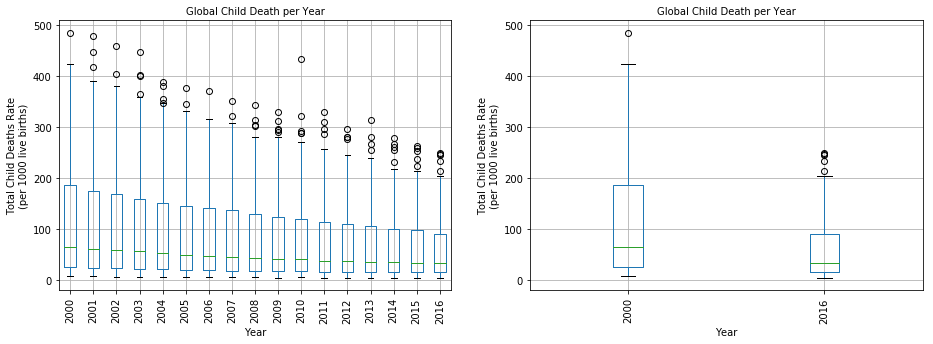

In [6]:
# Plot data
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
data_per_country.boxplot(column = 'Total', by= 'Year', ax = ax1)

plt.title("Global Child Death per Year", fontsize=10)
plt.suptitle("")
plt.ylabel('Total Child Deaths Rate\n(per 1000 live births)')
plt.xlabel('Year')
plt.xticks(rotation='vertical')

# Subset to start (2000) and end (2016) points 
labs = data_per_country.index.labels[1]
years_idx = [i for i in range(len(labs)) if labs[i] == 0 or labs[i] == 16] # 0 and 16 correspond to the index labels for 2000 and 2016

ax2 = fig.add_subplot(122)
data_per_country.iloc[years_idx].boxplot(column = 'Total', by= 'Year', ax=ax2)

plt.title("Global Child Death per Year", fontsize=10)
plt.suptitle("")
plt.ylabel('Total Child Deaths Rate\n(per 1000 live births)')
plt.xlabel('Year')
plt.xticks(rotation = 'vertical')

plt.show()

The boxplots above shows that a slow, but steady, decline of the average child death has been observed globally. Particularly, there has been a noticeable improvement between 2000 and 2016 both in respect to the average number (central tendency) of child deaths and the reduction of the differences between countries (variance). Do these changes reflect a meaningful and significant improvement or are they simply due to chance? Before testing the hypothesis that there are no differences in child death between 2000 and 2016 (null hypothesis), it is important to understand how the global child deaths are distributed.

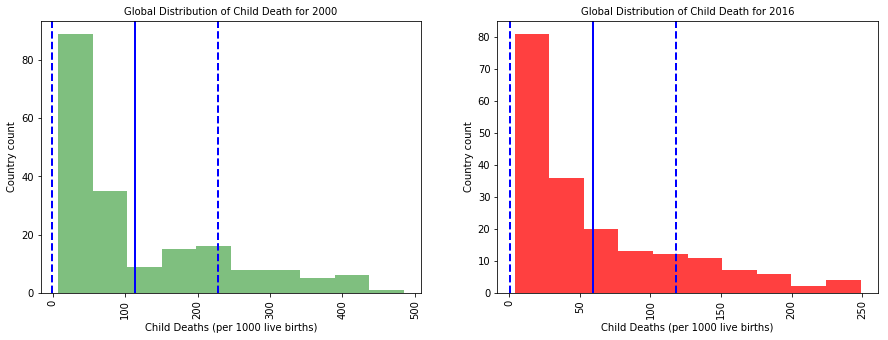

In [7]:
# Check global distribution of child deaths 
data_2000 = np.array(data_per_country.xs('2000', level = 'Year')['Total'])
data_2016 = np.array(data_per_country.xs('2016', level = 'Year')['Total'])

# Plot data
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.hist(data_2000, color = 'green', alpha = 0.5)

plt.title("Global Distribution of Child Death for 2000", fontsize=10)
plt.ylabel('Country count')
plt.xlabel('Child Deaths (per 1000 live births)')
plt.xticks(rotation='vertical')
plt.axvline(data_2000.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(data_2000.mean() + data_2000.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(data_2000.mean()-data_2000.std(), color='b', linestyle='dashed', linewidth=2) 

plt.subplot(1,2,2)
plt.hist(data_2016, color = 'red', alpha = 0.75)

plt.title("Global Distribution of Child Death for 2016", fontsize=10)
plt.ylabel('Country count')
plt.xlabel('Child Deaths (per 1000 live births)')
plt.xticks(rotation='vertical')
plt.axvline(data_2016.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(data_2016.mean() + data_2016.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(data_2016.mean() - data_2016.std(), color='b', linestyle='dashed', linewidth=2) 

plt.show()

The child death rates do not seem to be normally (gaussian) distributed across the different countries. In fact, the distribution is right (positive) skewed, with most countries showing relatively low child death rates, suggesting that a minority of countries are much worse off than the majority. As the measurement of child death refers to a rate (number of events per a constant unit), it could be thought that the global child death distribution follows a Poisson distribution.

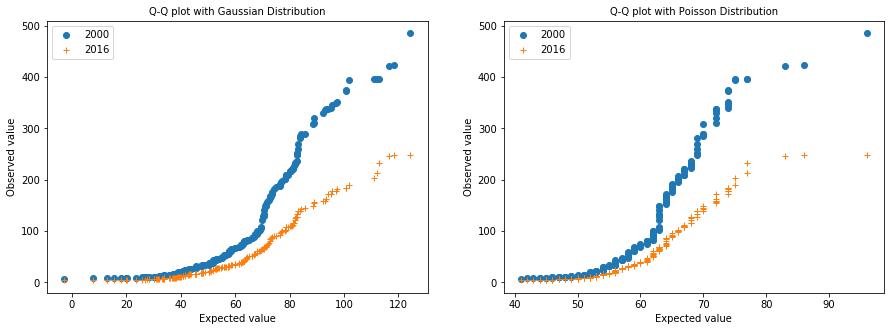

In [8]:
# Making two distribution variables.
normal = np.random.normal(data_2016.mean(), 25, len(data_2016))
poisson = np.random.poisson(data_2016.mean(), len(data_2016))

# Sorting the values in ascending order.
normal.sort()
poisson.sort()
data_2000.sort()
data_2016.sort()

# Q-Q plots
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(normal, data_2000, "o", label = '2000') 
plt.plot(normal, data_2016, "+", label = '2016') 

plt.ylabel('Observed value')
plt.xlabel('Expected value')
plt.title("Q-Q plot with Gaussian Distribution", fontsize=10)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(poisson, data_2000, "o", label = '2000') 
plt.plot(poisson, data_2016, "+", label = '2016') 

plt.ylabel('Observed value')
plt.xlabel('Expected value')
plt.title("Q-Q plot with Poisson Distribution", fontsize=10)
plt.legend(loc='upper left')

plt.show()

It is apparent from the Q-Q plots above that the global child deaths are not normally distributed (and may not follow a Poisson distribution as well), having extremely high values skewing the distribution. As such, the data can be [log transformed](http://onlinestatbook.com/2/transformations/log.html) to obtain a more *"gaussian" distribution* by reducing the effect of these outlier values.

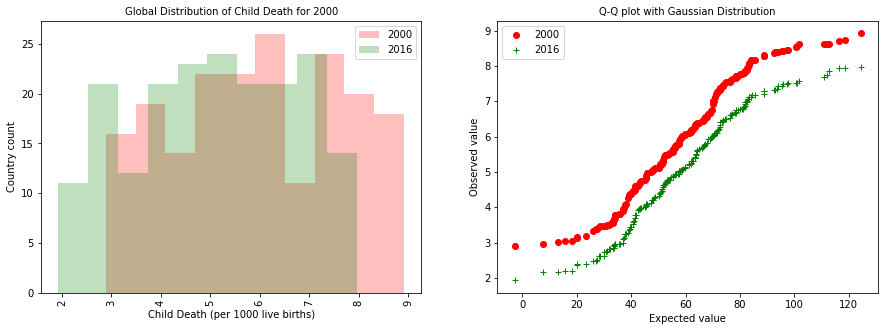

In [9]:
# Plots for log transformed data (**Data transformation**)
plt.figure(figsize=(15, 5))

# Histograms
plt.subplot(1,2,1)

# 2000
plt.hist(np.log2(data_2000), color = 'red', alpha = 0.25, label='2000')
plt.title("Global Distribution of Child Death for 2000", fontsize=10)

plt.ylabel('Total Child Deaths Rate\n(per 1000 live births)')
plt.xlabel('Year')
plt.xticks(rotation = 'vertical')
# 2016
plt.hist(np.log2(data_2016), color = 'green', alpha = 0.25, label='2016')
plt.title("Global Distribution of Child Death for 2000", fontsize=10)

plt.ylabel('Country count')
plt.xlabel('Child Death (per 1000 live births)')
plt.xticks(rotation = 'vertical')
plt.legend(loc = 'upper right') 

# Q-Q plots
plt.subplot(1,2,2)
plt.plot(normal, np.log2(data_2000), "o", color = 'red', label='2000') 
plt.plot(normal, np.log2(data_2016), "+", color = 'green', label='2016')
plt.ylabel('Observed value')
plt.xlabel('Expected value')
plt.title("Q-Q plot with Gaussian Distribution", fontsize=10)
plt.legend(loc='best')

plt.show()

The log-transformed values follow a normal distribution much closer than the original values, with the [Q-Q plots](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) showing curvatures at the extremes which are consistent with the light tails observed in the histograms. It is also clear that there was a shift in the distribution to lower child death rates from 2000 to 2016, both from the overlayed histograms and the Q-Q plot. Given that the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) predicts that the estimated means of the samples are normally distributed, given a large enough sample, a statistical comparisons between the two years (inital 2000 and final 2016 values) can be performed with a t-test.

In [10]:
# Statistic analysis for log-transformed data
m = np.log2(data_2016).mean() - np.log2(data_2000).mean()
t = ttest_ind(np.log2(data_2016), np.log2(data_2000), equal_var=False).pvalue
print('\n*Considering the transformed data*')
print('The worldwide average change of child death (per 1000 live birth) from 2000 to 2016 was %1.2f (logged) or %1.2f (unlogged).' % (m, 2 ** m))
print('The p-value for this difference is %1.2e.' % (t))


# According to the Central Limit Theorem, the log transform was 
# probably not necessary given the sample 
# (actually it's the entire population) is > 50 
m = data_2016.mean() - data_2000.mean()
t = ttest_ind(data_2016, data_2000, equal_var=False).pvalue
print('\n*Not considering the transformed data*')
print('The worldwide average change of child death (per 1000 live birth) from 2000 to 2016 was %1.2f.' % (m))
print('The p-value for this difference is %1.2e.' % (t))

# Notes:
print('\n\nNote that the difference of the logs (%1.3f) is the the same as the log of the ratio (%1.3f).' % 
         (np.log2(data_2016.mean()) - np.log2(data_2000.mean()), 
          np.log2(data_2016.mean() / data_2000.mean()))
     )
print('However, the mean of the logs (%1.3f) is not the same as the log of the mean (%1.3f).' % 
         (np.log2(data_2016).mean(), np.log2(data_2016.mean()))
     )
print('''Consequently, interpreting the log results is not immediate, even though the \
unlogged difference (%1.3f) is close to the ratio of the means (%1.3f).'''  % 
         (2 ** (np.log2(data_2016).mean() - np.log2(data_2000).mean()), 
          data_2016.mean()/data_2000.mean())
     )
print('Which, by the way, suggest that the child death rates in 2016 were about half of those in 2000.')


*Considering the transformed data*
The worldwide average change of child death (per 1000 live birth) from 2000 to 2016 was -0.87 (logged) or 0.55 (unlogged).
The p-value for this difference is 2.95e-07.

*Not considering the transformed data*
The worldwide average change of child death (per 1000 live birth) from 2000 to 2016 was -53.96.
The p-value for this difference is 1.76e-08.


Note that the difference of the logs (-0.933) is the the same as the log of the ratio (-0.933).
However, the mean of the logs (5.111) is not the same as the log of the mean (5.892).
Consequently, interpreting the log results is not immediate, even though the unlogged difference (0.546) is close to the ratio of the means (0.524).
Which, by the way, suggest that the child death rates in 2016 were about half of those in 2000.


## Overall child death per country 
Statistical significant improvement of the children under-five death rates was observed globally.
However, this overall decline in child death may not reflect country-specific changes. Is this improvement in survival of children under 5 observed for every country, suggesting a generalised improvement in child health, or is the observed average effect dominated by a small proportion of extreme improvements? Which countries have experience a deterioration of child survival?

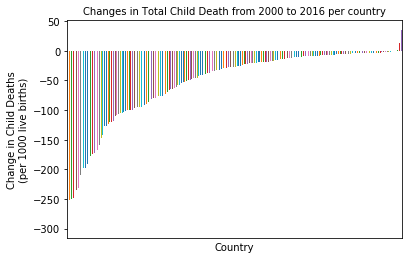

In [11]:
# Check Child death variation by country
delta_global = data_per_country.xs('2016', level = 'Year')['Total'] - data_per_country.xs('2000', level = 'Year')['Total']
delta_global_sort = delta_global.sort_values()
delta_global_sort.plot(kind = 'bar')

plt.title("Changes in Total Child Death from 2000 to 2016 per country", fontsize=10)
plt.ylabel('Change in Child Deaths\n(per 1000 live births)')
plt.xlabel('Country')
plt.xticks([])
plt.show()

Most of the countries experienced a reduction in child death over the 17 year of the study, even though the advances observed in child death prevention vary widely across countries. However, a small number of countries has seen a deterioration in survival of children under 5. Given the generalised improvement of child survival across the globe, the worsening of the situation in such countries is particularly worrisome. 

In [12]:
### Identify the countries with the worse Child Death
worse_countries = delta_global[delta_global > 0].index
print('The countries which saw detrioration of child deaths rates from 2000 to 2016 were: \n%s' % (', '.join(list(worse_countries))))

The countries which saw detrioration of child deaths rates from 2000 to 2016 were: 
Dominica, Grenada, Niue, Seychelles


To better understand the reasons why Grenada, Seychelles, Niue and Dominica saw a deterioration of the child death rates during the period of from 2000 to 2016, the specific causes of child death were analysed. 

In [13]:
# Subset to countries with worse child death rate
idxs = [(country,year) for country in worse_countries for year in ['2000','2016']]
data_worse_country = data_per_country.loc[idxs]

# Get differences in child death rates for each cause of death
for country in worse_countries: 
    delta_worse = data_worse_country.loc[(country, '2016')] - data_worse_country.loc[(country, '2000')]
    delta_worse = delta_worse.rename((country,'delta'))
    data_worse_country = data_worse_country.append(delta_worse)

# Remove causes with no deaths
zero_events = data_worse_country != 0
zero_events = zero_events.any(axis=0)
data_worse_country = data_worse_country.loc[:,zero_events]

# Keep only the differences in child death rates
data_worse_country = data_worse_country.loc[data_worse_country.index.labels[1] == 2] # 2 is the new label for delta

# Drop Year index and total column
data_worse_country.index = data_worse_country.index.droplevel('Year')
data_worse_country = data_worse_country.drop(columns = 'Total')
data_worse_country

0           Diarrhoeal diseases  Meningitis/encephalitis  \
Country                                                    
Dominica                    0.4                      0.0   
Grenada                    -1.0                      0.0   
Niue                       -0.8                     -0.2   
Seychelles                 -0.2                      0.0   

0           Acute lower respiratory infections  Prematurity  \
Country                                                       
Dominica                                   2.4         -4.1   
Grenada                                    0.8         -4.3   
Niue                                       0.2          0.0   
Seychelles                                -0.2          0.2   

0           Birth asphyxia and birth trauma  \
Country                                       
Dominica                               20.6   
Grenada                                -1.7   
Niue                                    0.0   
Seychelles                             -0.1   

0           Sepsis and other infectious conditions of the newborn  \
Country                                                             
Dominica                                                  4.8       
Grenada                                                  -0.6       
Niue                                                      0.0       
Seychelles                                                0.4       

0           Other communicable, perinatal and nutritional conditions  \
Country                                                                
Dominica                                                  2.8          
Grenada                                                   1.0          
Niue                                                      1.0          
Seychelles                                                0.7          

0           Congenital anomalies  Other noncommunicable diseases  Injuries  
Country                                                                     
Dominica                     5.4                             2.0       0.4  
Grenada                      2.9                             1.2       2.0  
Niue                         3.0                             2.6       6.6  
Seychelles                   0.0                             0.4       0.6

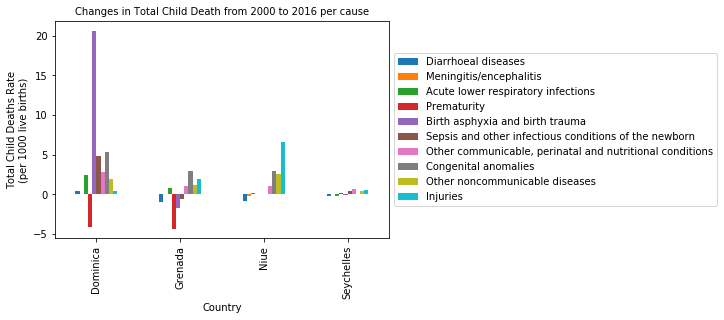

In [14]:
# Plot child death per cause
data_worse_country.plot(kind='bar')

plt.title("Changes in Total Child Death from 2000 to 2016 per cause", fontsize=10)
plt.ylabel('Total Child Deaths Rate\n(per 1000 live births)')
plt.xlabel('Country')
plt.legend(loc = 'center left',  bbox_to_anchor=(1, 0.5))

plt.show()

It is clear from the barplot above that, even though the overall child death deteriorated in Grenada, Seychelles, Niue and Dominica, some causes of death actually saw improvements, particularly those related to prematurity. It is also immediate that Dominica experienced a dramatic and country-specific increase in child deaths by for *Birth asphyxia and trauma*. Which were then the causes for the worsening child death situation in common for these countries?

In [15]:
# Check which causes of child death didn't decrease in the countries 
worse_causes = data_worse_country >= 0
data_worse_country = data_worse_country.loc[:,worse_causes.all()]

causes_means = data_worse_country.mean()
causes_means = causes_means.rename('Mean')
data_worse_country.append(causes_means)

0           Other communicable, perinatal and nutritional conditions  \
Country                                                                
Dominica                                                2.800          
Grenada                                                 1.000          
Niue                                                    1.000          
Seychelles                                              0.700          
Mean                                                    1.375          

0           Congenital anomalies  Other noncommunicable diseases  Injuries  
Country                                                                     
Dominica                   5.400                            2.00       0.4  
Grenada                    2.900                            1.20       2.0  
Niue                       3.000                            2.60       6.6  
Seychelles                 0.000                            0.40       0.6  
Mean                       2.825                            1.55       2.4

Four child death causes were found to not decrease over the 17 years of study in the four countries showing a deterioration in their child survival rates, but the individual contribution of each cause is still modest. Of notice, *Congenital anomalies* represented a large increase in child deaths for Dominica and *Injuries* represented the biggest increase for Niue.

## Contribution of child death causes per country
Having identified the four common causes of child death associated with the deterioration of child survival in some countries, it becomes important to understand if this reflects a global phenomenon (trend) or if occurred just in some countries. The report will focus on the *Congenital anomalies* and *Injuries*, since these represent the greatest increases of child death and also reflect different balances between population genetics and environmental/social factors.

In [16]:
# Example of using functions to avoid duplicating code
def run_analysis(data, cause):
    
    # Plot data
    fig = plt.figure(figsize=(15, 15))

    ax1 = fig.add_subplot(221)
    data.boxplot(column = cause, by= 'Year', ax = ax1)
    plt.title("Global " + cause + " deaths per Year", fontsize=10)
    plt.suptitle("")
    plt.ylabel('Total Child Deaths Rate\n(per 1000 live births)')
    plt.xlabel('Year')
    plt.xticks(rotation='vertical')

    ax2 = fig.add_subplot(222)
    delta = data.xs('2016', level = 'Year')[cause] - data.xs('2000', level = 'Year')[cause]
    delta.sort_values(inplace=True)
    delta.plot(kind='bar')
    plt.title("Changes in " + cause + " deaths from 2000 to 2016 per country", fontsize=10)
    plt.suptitle("")
    plt.ylabel('Total Child Deaths Rate\n(per 1000 live births)')
    plt.xlabel('Country')
    plt.xticks([])


    ax3 = fig.add_subplot(223)
    plt.hist(data.xs('2000', level = 'Year')[cause], color = 'red', alpha = 0.25, label='2000')
    plt.title("Global Distribution of " + cause + " deaths for 2000", fontsize=10)
    plt.suptitle("")
    plt.ylabel('Country count')
    plt.xlabel('Child Death (per 1000 live births)')
    plt.xticks(rotation='vertical')
    plt.legend(loc='upper right') 

    ax34 = fig.add_subplot(224)
    plt.hist(data.xs('2016', level = 'Year')[cause], color = 'green', alpha = 0.25, label='2016')
    plt.title("Global Distribution of " + cause + " deaths for 2016", fontsize=10)
    plt.suptitle("")
    plt.ylabel('Country count')
    plt.xlabel('Child Death (per 1000 live births)')
    plt.xticks(rotation='vertical')
    plt.legend(loc='upper right') 

    plt.show()
    
    # Statistical test
    print('The mean difference in global %s-related deaths between 2016 and 2000 is %1.2f' % 
          (cause, data.xs('2016', level = 'Year')[cause].mean() - data.xs('2000', level = 'Year')[cause].mean()))
    print('The p-value for this difference is %1.2e' % 
          (ttest_ind(data.xs('2016', level = 'Year')[cause],data.xs('2000', level = 'Year')[cause], equal_var=False).pvalue))


### Congenital anomalies

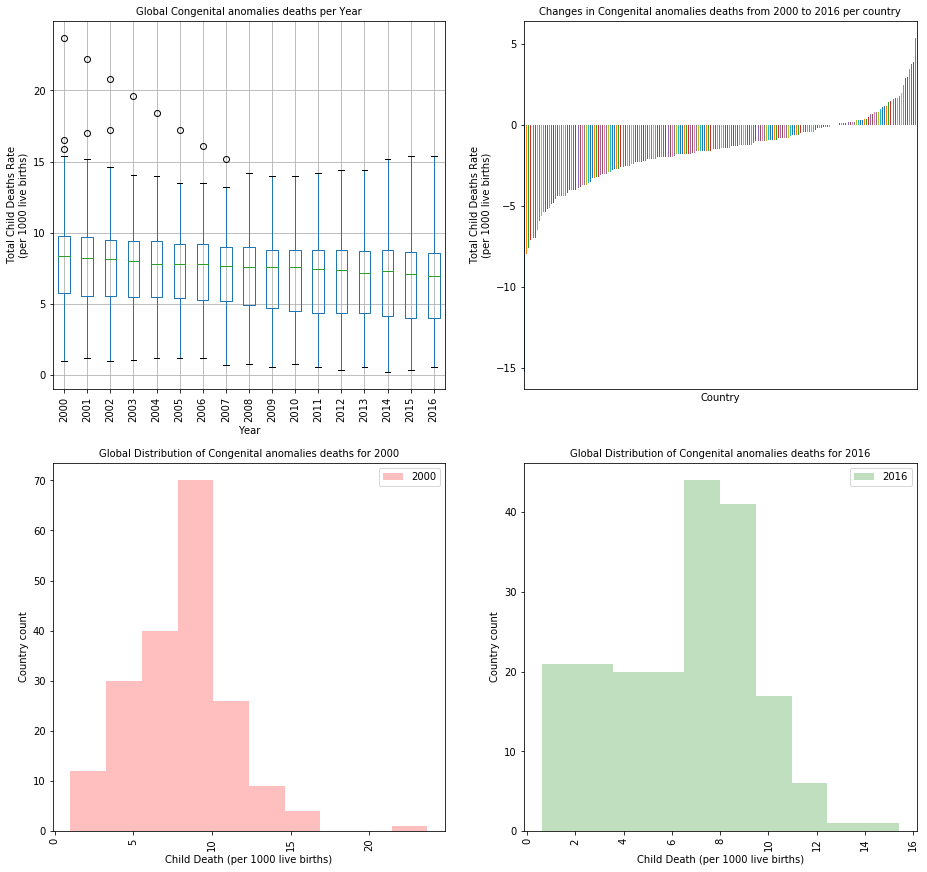

The mean difference in global Congenital anomalies-related deaths between 2016 and 2000 is -1.60
The p-value for this difference is 8.51e-07


In [17]:
run_analysis(data_per_country, 'Congenital anomalies')

### Injuries

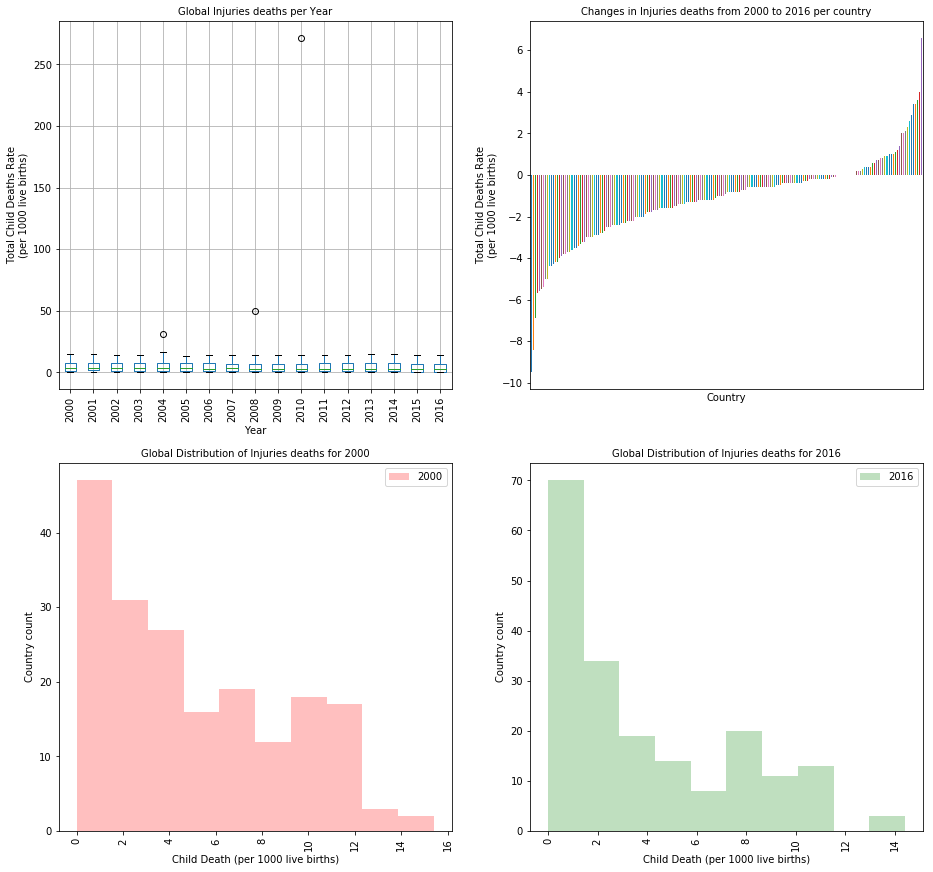

The mean difference in global Injuries-related deaths between 2016 and 2000 is -1.18
The p-value for this difference is 1.99e-03


In [18]:
run_analysis(data_per_country, 'Injuries')

# Absolute child death rates
The increase of *Congenital anomalies* and *Injuries* leading to under-five child death observed for the countries with worsening of child survival seems to have also occurred in a number of other countries, even though, at the global level, a significant decrease in the number of child deaths has been noticed. As such, the global trend for these causes of child death seems to be a slow decrease and there is not evidence, so far, of a generalised increase of *Congenital anomalies* and *Injuries*. 
So far, this report has looked at the **changes** in child death between 2000 and 2016, focusing on identifying situations where deterioration of child health occurred. However, these are relative indicators and the countries which experienced worsening of their child health situation, may not the the countries where child mortality is the greatest.

In [19]:
# Top 10 worse countries by total child death in 2016
# Add Chad as control
df = data_per_country.xs('2016', level = 'Year').groupby('Country').aggregate(np.mean).sort_values(by='Total', ascending = False)
[print('%s if number %d on the list' % (df.index[idx],idx+1)) for idx in range(len(df.index)) if df.index[idx] in ['Chad'] + list(worse_countries)]
df.head(n=10)

Chad if number 3 on the list
Niue if number 59 on the list
Dominica if number 63 on the list
Grenada if number 102 on the list
Seychelles if number 111 on the list


0                                 HIV/AIDS  Diarrhoeal diseases  Pertussis  \
Country                                                                      
Central African Republic               3.7                 26.2        0.0   
Somalia                                0.6                 32.9        0.0   
Chad                                   1.2                 34.0        0.0   
Sierra Leone                           1.7                 21.0        0.0   
Mali                                   1.6                 18.4        0.0   
Nigeria                                4.6                 20.7        0.0   
Benin                                  1.4                 20.3        0.0   
Lesotho                               26.8                 14.5        0.0   
Equatorial Guinea                      4.6                 11.7        0.0   
Democratic Republic of the Congo       0.9                 19.7        0.0   

0                                 Tetanus  Measles  Meningitis/encephalitis  \
Country                                                                       
Central African Republic              3.0      7.2                      8.2   
Somalia                               5.0     18.8                     11.0   
Chad                                  1.6      0.6                      9.2   
Sierra Leone                          0.6     15.6                      3.2   
Mali                                  0.8      0.0                      3.6   
Nigeria                               1.8      3.8                      4.2   
Benin                                 0.5      0.8                      3.6   
Lesotho                               1.4      1.0                      2.8   
Equatorial Guinea                     1.0     16.8                      1.6   
Democratic Republic of the Congo      0.6      0.4                      4.6   

0                                 Malaria  Acute lower respiratory infections  \
Country                                                                         
Central African Republic             34.4                                41.1   
Somalia                               2.6                                57.6   
Chad                                 15.6                                59.8   
Sierra Leone                         45.6                                31.0   
Mali                                 52.0                                28.6   
Nigeria                              25.6                                38.9   
Benin                                23.4                                28.8   
Lesotho                               0.0                                27.6   
Equatorial Guinea                    32.4                                26.4   
Democratic Republic of the Congo     23.4                                29.4   

0                                 Prematurity  \
Country                                         
Central African Republic                 29.8   
Somalia                                  22.3   
Chad                                     23.8   
Sierra Leone                             23.8   
Mali                                     24.7   
Nigeria                                  24.7   
Benin                                    24.6   
Lesotho                                  30.4   
Equatorial Guinea                        22.8   
Democratic Republic of the Congo         21.6   

0                                 Birth asphyxia and birth trauma  \
Country                                                             
Central African Republic                                     27.8   
Somalia                                                      31.6   
Chad                                                         25.8   
Sierra Leone                                                 21.6   
Mali                                                         21.6   
Nigeria                                                      23.6   


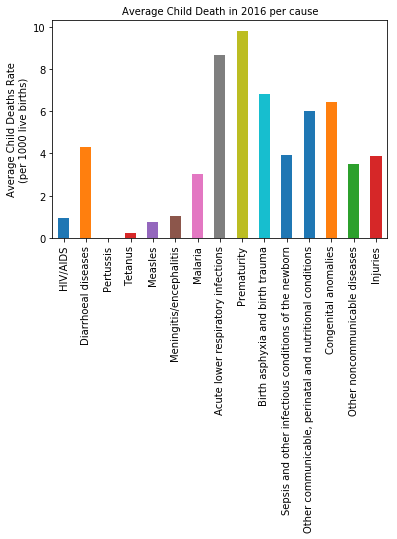

In [20]:
# Total child deaths by cause in 2016
data_per_country.drop(columns = 'Total').xs('2016', level = 'Year').mean().plot(kind='bar')

plt.title("Average Child Death in 2016 per cause", fontsize=10)
plt.ylabel('Average Child Deaths Rate\n(per 1000 live births)')
plt.xlabel('')

plt.show()

None of the four countries showing deterioration of the child survival since 2000 are in the top 10 countries with worse child health indicators. In fact, Niue is the worse scoring of these countries, being on position 59 out of 192 countries. In addition, the one cause of child death that appears to be making the best improvements in those four countries, *Prematurity*, turns out to be the cause of most child deaths globally, even though *Congenital anomalies* it's the fourth worse cause and *Injuries* is still a relevant cause of child death. This dissociation between the results for the countries that showed a worsening in child survival and the global trends suggests that generalisations may be difficult to carry from country level to the global level, and *vice versa*. Given that the countries with worse rates of child death are not those that experiences the deterioration of these same rate, is there any association between these two measurements? 

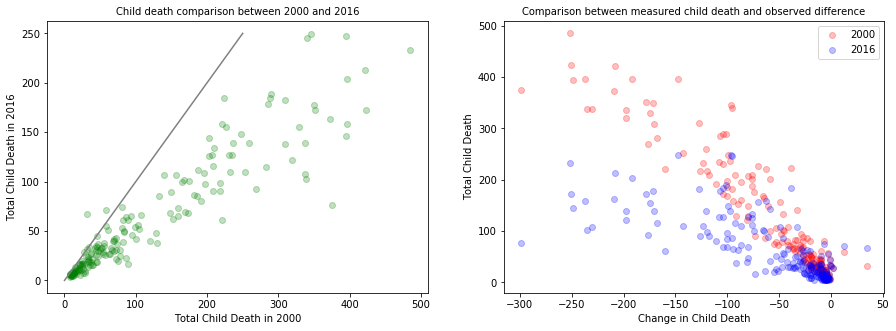

In [21]:
# Scatterplots to compare changes in rates to absolute measured rates

plt.figure(figsize=(15, 5))

# Compare 2000 and 2016 rates
plt.subplot(1,2,1)
plt.plot(data_per_country.xs('2000', level = 'Year')['Total'], data_per_country.xs('2016', level = 'Year')['Total'], "o", color = 'green', alpha = 0.25)

plt.ylabel('Total Child Death in 2016')
plt.xlabel('Total Child Death in 2000')
plt.title("Child death comparison between 2000 and 2016", fontsize=10)
plt.plot([0,250],[0,250], color = 'grey') # Add unchanged reference line

# Compare changes to 2000 and 2016
plt.subplot(1,2,2)
plt.plot(delta_global, data_per_country.xs('2000', level = 'Year')['Total'], "o", color = 'red', alpha = 0.25, label='2000')
plt.plot(delta_global, data_per_country.xs('2016', level = 'Year')['Total'], "o", color = 'blue', alpha = 0.25, label='2016')

plt.ylabel('Total Child Death')
plt.xlabel('Change in Child Death')
plt.title("Comparison of child death between 2000 and 2016", fontsize=10)
plt.title("Comparison between measured child death and observed difference", fontsize=10)
plt.legend(loc='upper right') 

plt.show()

The scatterplots above clearly show that the child death rates decreased between 2000 and 2016 for most countries, further showing that this decrease was greater for those countries with worse conditions initially. Again, this suggests that a progressive equalization of the child health has been observed in the 17 years of this study.

## Conclusions
This study initially looked into the global changes of child death, finding that a statistically meaningful decrease of under-five child mortality occurred during 2000 and 2016, accompanied by a noticeable reduction of the differences between countries. Only four countries ([Dominica](https://en.wikipedia.org/wiki/Dominica), [Grenada](https://en.wikipedia.org/wiki/Grenada), [Niue](https://en.wikipedia.org/wiki/Niue) and [Seychelles](https://en.wikipedia.org/wiki/Seychelles)) experienced an increase in child deaths over this period, with congenital anomalies, injuries, birth asphyxia and trauma (and Sepsis and other infectious conditions of the newborn) appearing to be the major reasons behind the deterioration of child health. Cyclones have hit both Niue and Grenada in 2004 and 2005, with unknown effects on the health and child care system. No other major event was identified that could explain the increased child deaths observed. All these countries have in common being small island nations (Caribean sea, Polyneasia and West Indian Ocean) with few habitants and [populations comparable](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population) to Iceland, Monaco, Gibraltar or  the U.S.Virgin Islands, and with an economy based on agriculture and/or tourism. Islands states with small populations are expected to have low genetic diversity resulting from years of ethic inbreeding, which is associated with high incidence of congenital anomalies. In addition, being dependent on agriculture, it would be interesting to understand if children are generally more exposed to danger of injury, for example, by unofficial (familiar) child labor, increased accessibility to hazardous equipment or, perhaps, simply higher number natural treats arising from less densely populated areas. Regardless of the reasons for the increased child deaths in these countries, they are not amongst those which score poorer in 2016 and the identified causes of child death have a decreasing global trend. This observation is explained by the fact that countries with worse indicators in 2000 were the ones that showed the greatest reduction in child deaths and that conclusions on the causes of child death cannot be directly be extrapolated between countries.